<a href="https://colab.research.google.com/github/gizemnurbektas/CreditRisk-Model/blob/main/Datascienceproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import shap
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset (1).csv


In [ ]:
df =pd.read_csv('credit_risk_dataset.csv')

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
print("\nEksik değer sayıları:")
print(df.isnull().sum())

df.describe()


Eksik değer sayıları:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df = df.dropna()

print(df['loan_status'].value_counts())

# Kategorik sütunları seçelim
categorical_cols = df.select_dtypes(include=['object']).columns
print("Kategorik kolonlar:", categorical_cols)

# One-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Bağımlı ve bağımsız değişken ayrımı
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


loan_status
0    22435
1     6203
Name: count, dtype: int64
Kategorik kolonlar: Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


In [ ]:
# Yeni CSV olarak kaydet
df.to_csv("credit_risk_dataset_with_id.csv", index=False)

# Bilgisayarına indir
from google.colab import files
files.download("credit_risk_dataset_with_id.csv")


In [ ]:
# 1'den başlayarak satır numarası oluştur
df.insert(0, 'person_id', range(1, len(df) + 1))

# Kontrol edelim
df.head()


,person_id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,1,22,59000,123.0,35000,16.02,1,0.59,3,False,...,False,True,False,False,False,True,False,False,False,True
1,2,21,9600,5.0,1000,11.14,0,0.10,2,False,...,False,False,False,True,False,False,False,False,False,False
2,3,25,9600,1.0,5500,12.87,1,0.57,3,False,...,True,False,False,False,True,False,False,False,False,False
3,4,23,65500,4.0,35000,15.23,1,0.53,2,False,...,True,False,False,False,True,False,False,False,False,False
4,5,24,54400,8.0,35000,14.27,1,0.55,4,False,...,True,False,False,False,True,False,False,False,False,True


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_risk_dataset_with_id.csv to credit_risk_dataset_with_id (1).csv


In [ ]:
import pandas as pd

# Yeni dosyayı oku
df = pd.read_csv("credit_risk_dataset_with_id.csv")

# Kontrol edelim
df.head()


,person_id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,1,22,59000,123.0,35000,16.02,1,0.59,3,False,...,False,True,False,False,False,True,False,False,False,True
1,2,21,9600,5.0,1000,11.14,0,0.10,2,False,...,False,False,False,True,False,False,False,False,False,False
2,3,25,9600,1.0,5500,12.87,1,0.57,3,False,...,True,False,False,False,True,False,False,False,False,False
3,4,23,65500,4.0,35000,15.23,1,0.53,2,False,...,True,False,False,False,True,False,False,False,False,False
4,5,24,54400,8.0,35000,14.27,1,0.55,4,False,...,True,False,False,False,True,False,False,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28638 entries, 0 to 28637
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_id                    28638 non-null  int64  
 1   person_age                   28638 non-null  int64  
 2   person_income                28638 non-null  int64  
 3   person_emp_length            28638 non-null  float64
 4   loan_amnt                    28638 non-null  int64  
 5   loan_int_rate                28638 non-null  float64
 6   loan_status                  28638 non-null  int64  
 7   loan_percent_income          28638 non-null  float64
 8   cb_person_cred_hist_length   28638 non-null  int64  
 9   person_home_ownership_OTHER  28638 non-null  bool   
 10  person_home_ownership_OWN    28638 non-null  bool   
 11  person_home_ownership_RENT   28638 non-null  bool   
 12  loan_intent_EDUCATION        28638 non-null  bool   
 13  loan_intent_HOME

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4487
           1       0.96      0.72      0.82      1241

    accuracy                           0.93      5728
   macro avg       0.94      0.86      0.89      5728
weighted avg       0.93      0.93      0.93      5728

Confusion Matrix:


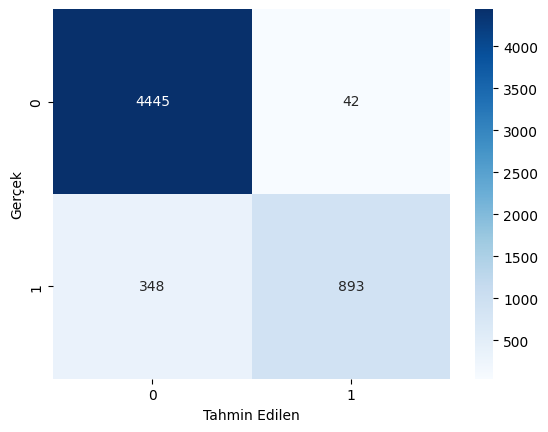

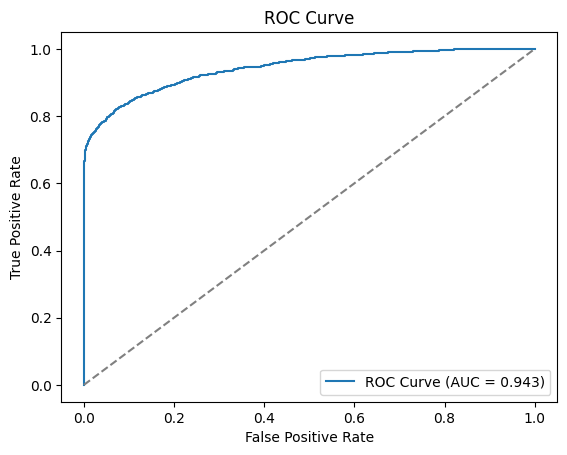

In [ ]:
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# ROC Eğrisi
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='ROC Curve (AUC = %.3f)' % roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
plt.plot([0,1],[0,1],'--',color='gray')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


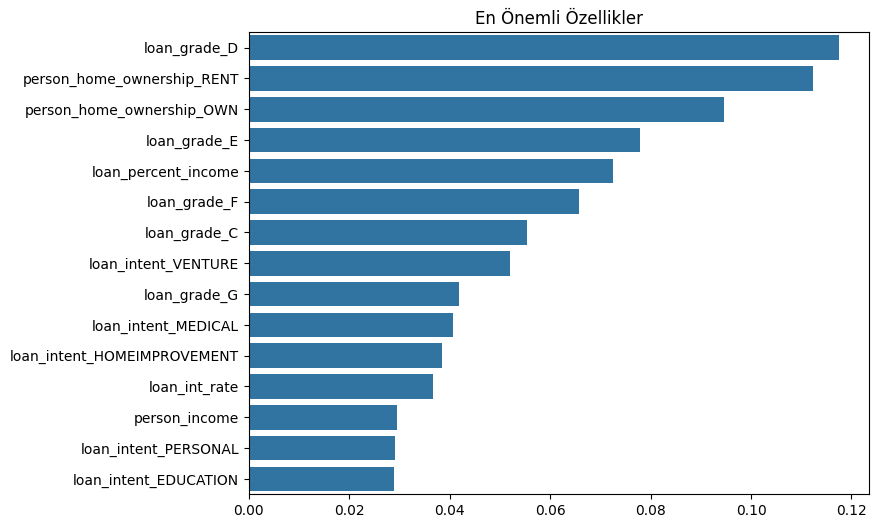

In [ ]:
importance = model.feature_importances_
indices = np.argsort(importance)[::-1][:15]  # en önemli 15 özellik

plt.figure(figsize=(8,6))
sns.barplot(x=importance[indices], y=np.array(X.columns)[indices])
plt.title("En Önemli Özellikler")
plt.show()


In [ ]:
!pip install --upgrade shap==0.46.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.9/543.9 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.49.1
    Uninstalling shap-0.49.1:
      Successfully uninstalled shap-0.49.1


In [ ]:
# Yeni müşteri örneği (örnek değerleri değiştir)
new_customer = pd.DataFrame([{
    'person_age': 35,
    'person_income': 85000,
    'person_home_ownership_RENT': 1,
    'person_emp_length': 5,
    'loan_intent_EDUCATION': 0,
    'loan_amnt': 12000,
    'loan_int_rate': 9.5,
    'cb_person_cred_hist_length': 7,
    'loan_grade_B': 1,
    'loan_grade_C': 0,
    'loan_grade_D': 0,
    'loan_grade_E': 0,
    'loan_grade_F': 0,
    'loan_grade_G': 0
}])

# Eksik sütunları tamamla (eğitim setiyle aynı sırada olmalı)
new_customer = new_customer.reindex(columns=X.columns, fill_value=0)

# Ölçekle ve tahmin et
new_scaled = scaler.transform(new_customer)
pred = model.predict(new_scaled)

if pred == 1:
    print("✅ Kredi onaylanabilir.")
else:
    print("❌ Kredi reddedilebilir.")


❌ Kredi reddedilebilir.


In [ ]:
corr = df.corr()['loan_status'].sort_values(ascending=False)
print(corr)


loan_status                    1.000000
loan_percent_income            0.379689
loan_int_rate                  0.339350
loan_grade_D                   0.325998
person_home_ownership_RENT     0.236239
loan_grade_E                   0.184503
cb_person_default_on_file_Y    0.182019
loan_amnt                      0.113550
loan_grade_F                   0.100320
loan_grade_G                   0.084541
loan_intent_MEDICAL            0.059955
loan_intent_HOMEIMPROVEMENT    0.034534
person_home_ownership_OTHER    0.009840
cb_person_cred_hist_length    -0.015649
loan_grade_C                  -0.016435
loan_intent_PERSONAL          -0.021054
person_age                    -0.023333
loan_intent_EDUCATION         -0.056138
loan_intent_VENTURE           -0.078644
person_emp_length             -0.082638
loan_grade_B                  -0.096187
person_home_ownership_OWN     -0.104832
person_income                 -0.139938
Name: loan_status, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Katsayıları DataFrame olarak göster
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coeff_df.head(15)


,Feature,Coefficient
5,loan_percent_income,1.423453
17,loan_grade_D,0.750208
18,loan_grade_E,0.444376
9,person_home_ownership_RENT,0.410580
20,loan_grade_G,0.306053
4,loan_int_rate,0.262654
19,loan_grade_F,0.249676
16,loan_grade_C,0.090254
1,person_income,0.052259
15,loan_grade_B,0.048913


In [ ]:
# Modelden olasılık tahmini al
probs = model.predict_proba(X_test)[:, 1]  # 1 = kredi onay olasılığı

# Findeks puanına dönüştür (0–1900 arası)
findex_scores = (probs * 1900).astype(int)


In [ ]:
# ----------------------------------------------
# 🎯 Findex Benzeri Puanlama Hesaplama
# ----------------------------------------------

# 1️⃣ Modelden olasılık tahmini al
# predict_proba() → [onaylanmaz olasılığı, onaylanır olasılığı]
# biz yalnızca onaylanır (1) olasılığını alıyoruz
probs = model.predict_proba(X_test)[:, 1]

# 2️⃣ Olasılığı 0–1900 arası Findex puanına çevir
# örn: %82 olasılık = 0.82 * 1900 = 1558 puan
findex_scores = (probs * 1900).astype(int)

# 3️⃣ İlk 10 tahmin ve karşılık gelen Findex puanlarını göster
for i in range(150):
    print(f"Müşteri {i+1} | Onay Olasılığı: {probs[i]*100:.2f} | Findex Puanı: {findex_scores[i]}")


Müşteri 1 | Onay Olasılığı: 5.28 | Findex Puanı: 100
Müşteri 2 | Onay Olasılığı: 0.08 | Findex Puanı: 1
Müşteri 3 | Onay Olasılığı: 31.59 | Findex Puanı: 600
Müşteri 4 | Onay Olasılığı: 0.40 | Findex Puanı: 7
Müşteri 5 | Onay Olasılığı: 0.09 | Findex Puanı: 1
Müşteri 6 | Onay Olasılığı: 0.06 | Findex Puanı: 1
Müşteri 7 | Onay Olasılığı: 7.43 | Findex Puanı: 141
Müşteri 8 | Onay Olasılığı: 0.82 | Findex Puanı: 15
Müşteri 9 | Onay Olasılığı: 0.99 | Findex Puanı: 18
Müşteri 10 | Onay Olasılığı: 0.03 | Findex Puanı: 0
Müşteri 11 | Onay Olasılığı: 0.00 | Findex Puanı: 0
Müşteri 12 | Onay Olasılığı: 99.41 | Findex Puanı: 1888
Müşteri 13 | Onay Olasılığı: 3.26 | Findex Puanı: 61
Müşteri 14 | Onay Olasılığı: 0.14 | Findex Puanı: 2
Müşteri 15 | Onay Olasılığı: 0.53 | Findex Puanı: 10
Müşteri 16 | Onay Olasılığı: 31.83 | Findex Puanı: 604
Müşteri 17 | Onay Olasılığı: 41.84 | Findex Puanı: 794
Müşteri 18 | Onay Olasılığı: 11.55 | Findex Puanı: 219
Müşteri 19 | Onay Olasılığı: 8.79 | Findex Puanı: